# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Our objective here is predict sales prices for a collection of houses in Ames, Iowa. Hence, we need to find which features of this homes incluences more in the final price in order to build a supervised regression machine learning model.

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
sns.set_context('notebook')
sns.set_style('darkgrid')

## 2. Load the Data

In [2]:
!ls data/

data_description.txt  sample_submission.csv  test.csv  train.csv


In [10]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.shape, test.shape

((1460, 81), (1459, 80))

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3. Explore the data

In [5]:
train.columns, len(train.columns)

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

Dataset has 80 features.

* **Target**: SalePrice

* **Categorical**: 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle' 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',  'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'
    
* **Numerical**: 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold'

I have selected a set of attributes that I think can be useful to predict the sale price.

* **Promising variables**: LotArea, MSSubClass, Neighborhood, OverallQual, OverallCond, YearBuilt(convertible to Age)/YearRemodAdd, TotalBsmtSF, GrLivArea, BedroomAbvGr, Garage/nogarage

In [13]:
categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
               'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
               'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
               'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'ExterQual',
               'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
               'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
               'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
               'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence',
               'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']

numerical = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
             'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces',
             'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'GarageCars', 'GarageArea', 'WoodDeckSF',
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'YrSold']

* Missing Values on categorical attributes

In [17]:
nan = train[categorical].isna().sum()
nan[nan != 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64

Missing values in some categorical attributes represents the absence of the feature in that house. E.g.: NaN in GarageQual column means that there is no garage in that home.

* Missing values on numerical variables

In [18]:
nan = train[numerical].isna().sum()
nan[nan != 0].sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

### Target variable: SalePrice

In [19]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

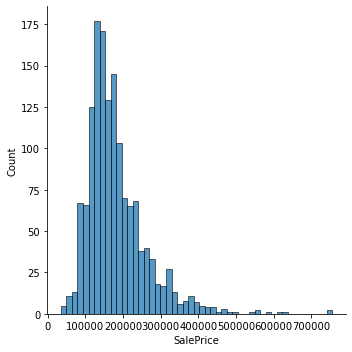

In [24]:
sns.displot(train['SalePrice']);

* A bit skewed normal distribution, we need to transform it using log

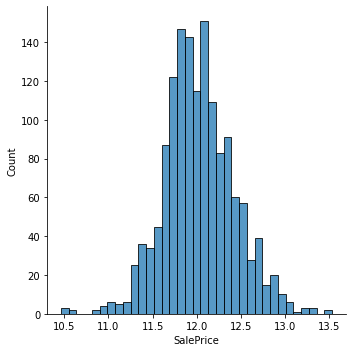

In [25]:
sns.displot(np.log(train['SalePrice']));

* Now it aproximates better to a normal distribution

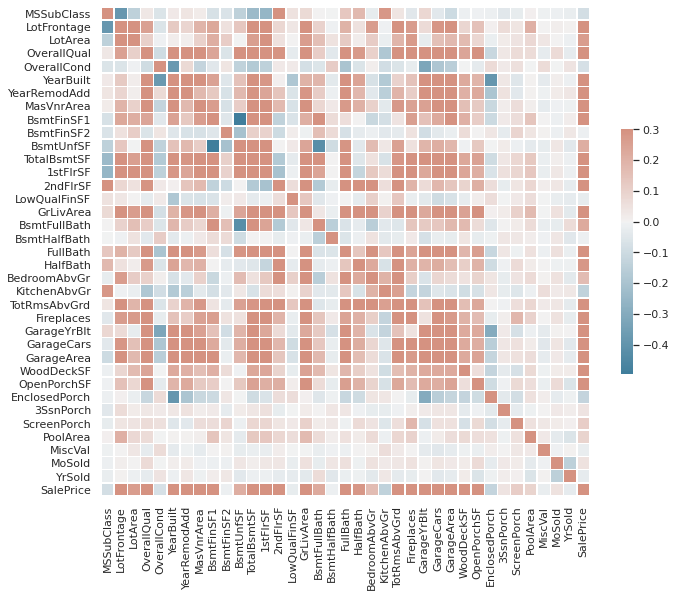

In [53]:
corr = train.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9));
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [29]:
train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Let's take a look at the variables that most correlate with SalePrice

* OverallQual

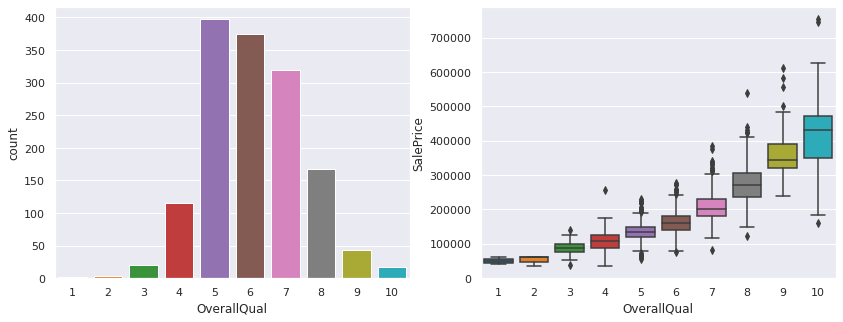

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(x='OverallQual', data=train, ax=ax[0]);
sns.boxplot(x='OverallQual', y='SalePrice', data=train, ax=ax[1]);

* GrLivArea

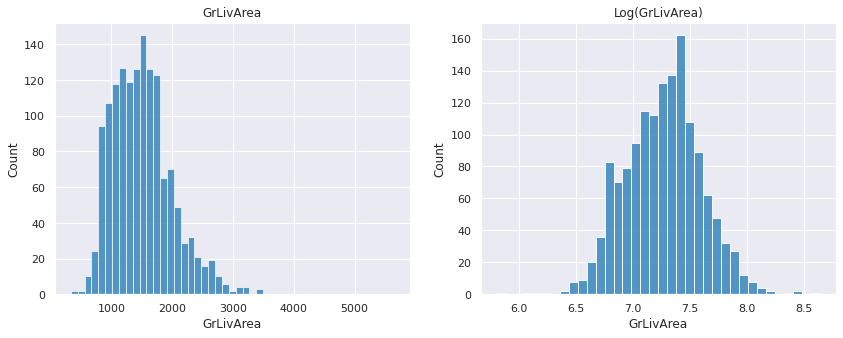

In [61]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(train['GrLivArea'], ax=ax[0]);
sns.histplot(np.log(train['GrLivArea']), ax=ax[1]);
ax[0].set_title('GrLivArea');
ax[1].set_title('Log(GrLivArea)');

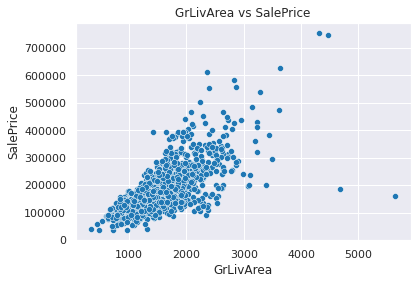

In [64]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train);
plt.title('GrLivArea vs SalePrice');

* There is a strong correlation between 'GrLivArea' and 'SalePrice'. Has two outliers.

## 4. Prepare the data

* Dealing with NaN
* Log on SalePrice, GrLivArea
* Remove outliers (GrLivArea)


## 5. Model building

## 6. Fine-tune the model

## 7. Submit results

## 8. Conclusion